In [1]:
import Ab as ab
import datetime as dt
import pandas as pd

#use east coast time zone
#sd = dt.datetime(2018,12,28) - dt.timedelta(days=7*14)
#ed = dt.datetime(2019,12,31) + dt.timedelta(days=1)
#sd = dt.datetime(2020,1,3) - dt.timedelta(days=7*15)
#ed = dt.datetime(2020,12,31) + dt.timedelta(days=1)
#sd = dt.datetime(2021,1,1) - dt.timedelta(days=7*15)
#ed = dt.datetime(2021,12,31) + dt.timedelta(days=1)
sd = dt.datetime(2016,1,4) - dt.timedelta(days=200)
ed = dt.datetime(2023,4,14) + dt.timedelta(days=1)

def get_data(name:str, sd, ed):
    d = ab.StockData(name)
    w = ab.StockData(name)
    d.get_data_from_yfinance(name, sd, ed, interval='1d')
    w.get_data_from_yfinance(name, sd, ed, interval='1wk')
    return d,w


ticker, ticker_weekly = get_data('TQQQ', sd, ed)
#set max number of rows to display
pd.set_option('display.max_rows', 1000)


GPU acceleration is NOT available
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:

#visually inspect data to make sure the weekly and daily data are aligned
ticker_joined = ticker.data[['Close']].merge(ticker_weekly.data[['Close']], how='left', left_index=True, right_index=True)
ticker_joined.tail(30)

,Close_x,Close_y
Date,,
2023-03-03,23.459999,23.459999
2023-03-06,23.559999,NaN
2023-03-07,22.680000,NaN
2023-03-08,22.990000,NaN
2023-03-09,21.780001,NaN
2023-03-10,20.879999,20.879999
2023-03-13,21.330000,NaN
2023-03-14,22.780001,NaN
2023-03-15,23.110001,NaN


In [3]:
test_start = dt.datetime(2016,1,4)
test_end =   dt.datetime(2023,3,3)
plot_start = dt.datetime(2016,1,1)
plot_end =   dt.datetime(2023,3,3)

<Axes: xlabel='Date'>

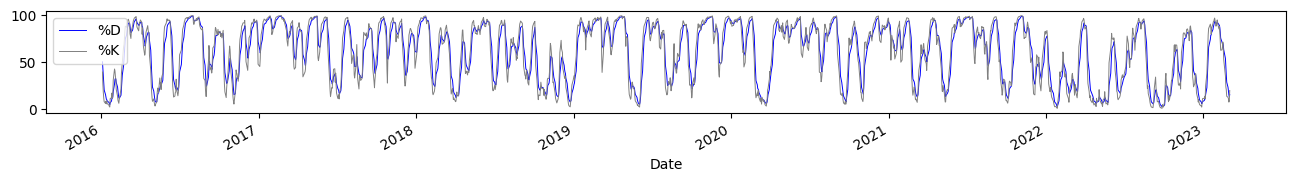

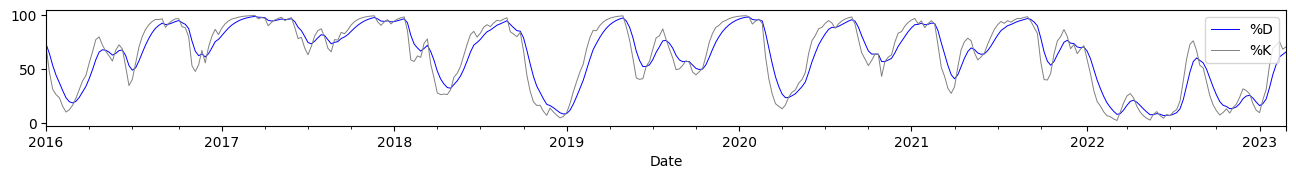

In [4]:
ticker.get_stochastic('Close', 14, 5, 5)
ticker_weekly.get_stochastic('Close', 14, 5, 5)
#plotting the slow stochastic oscillator with blue and green lines
ticker.data.loc[plot_start:plot_end].plot(y=['%D','%K'], figsize=(16,1.5), sharey=True, color=['blue', 'grey'],linewidth=0.7)
#plotting the slow stochastic oscillator with blue and green lines
ticker_weekly.data.loc[plot_start:plot_end].plot(y=['%D', '%K'], figsize=(16,1.5), sharey=True, color=['blue', 'grey'],linewidth=0.7)

In [5]:
#buy and hold
bah = ab.BuyAndHold(ticker)
#time the execution of the strategy
bah.run_strategy(ticker,test_start,test_end)

In [6]:

bah_bt = ab.BackTest()
bah_bt.run_backtest(bah,ticker,test_start,test_end)


<Ab.StockData object at 0x7f1a3b7e0970>:
cumulative return      : 424.98%
compound anual return  : 26.7294%
max_drawdown           : -81.11%
sharp_ratio            : 4.33%
average of daily return: 0.1877%
std of daily return    : 4.3356%
number of trades       : 2,
trading days           : 2615,
batting Average        : 100.00%
Gain Average           : 424.98%
Loss Average           : nan%
Risk Reward Ratio      : nan
Gain STD               : nan%
Loss STD               : nan%
        
    Buy Date            Sell Date Ticker     Quant  Buy Price  Sell Price   
0 2016-01-04  2023-03-03 00:00:00   TQQQ  0.223776    4.46875   23.459999  \

    Profit  Profit %  HoldingDays  LongTermProfit  ShortTermProfit   
0  4.24979   4.24979       2615.0         4.24979              0.0  \

   TaxCollectYear  TaxCollected  
0          2024.0           0.0  


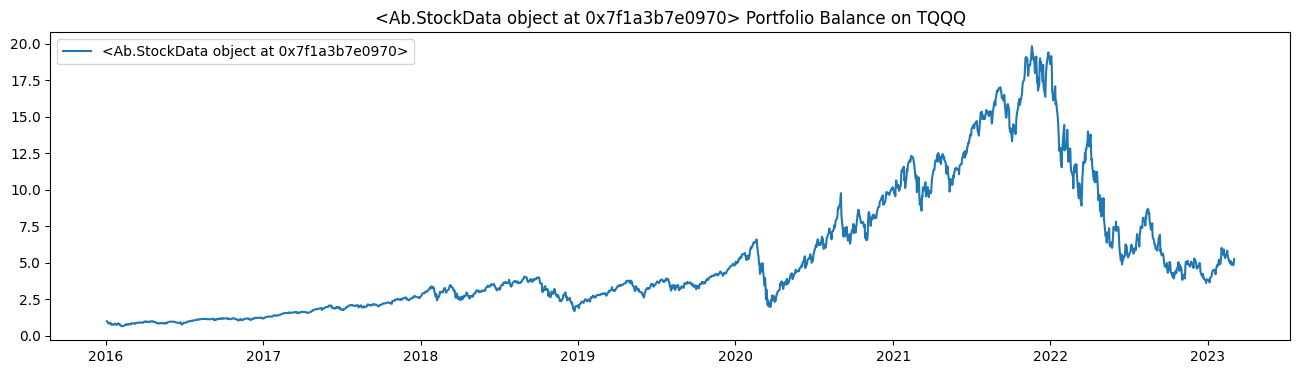

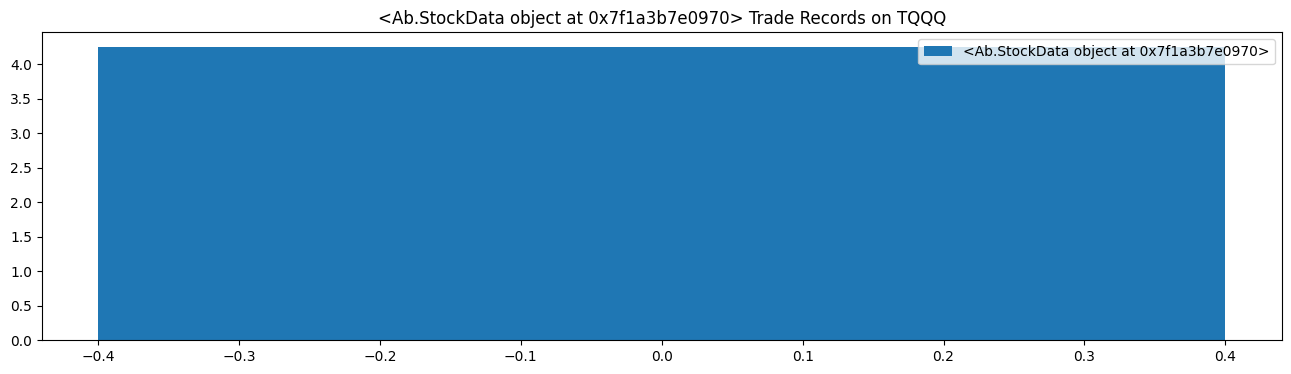

In [7]:

bah_bt.plot_balance()
bah_bt.plot_records()
bah_bt.performance_summary()
print(bah_bt.trade_records)

In [8]:
stg = ab.StochasticCross('StochasticCross',14, 5, 5, 80, 10, 0, 0, 0)
stg.run_strategy([ticker,ticker_weekly], test_start, test_end)
sc_bt = ab.BackTest()
sc_bt.run_backtest(stg,ticker,test_start,test_end)


StochasticCross-14-5-5-80-10-0-0-0:
cumulative return      : 732.17%
compound anual return  : 35.3502%
max_drawdown           : -47.34%
sharp_ratio            : 6.53%
average of daily return: 0.1411%
std of daily return    : 2.1588%
number of trades       : 18,
trading days           : 2615,
batting Average        : 58.82%
Gain Average           : 33.95%
Loss Average           : -9.32%
Risk Reward Ratio      : 3.64
Gain STD               : 19.32%
Loss STD               : 8.51%
        


,Buy Date,Sell Date,Ticker,Quant,Buy Price,Sell Price,Profit,Profit %,HoldingDays,LongTermProfit,ShortTermProfit,TaxCollectYear,TaxCollected
0,2016-03-11,2016-05-06 00:00:00,TQQQ,0.254318,3.932083,3.831667,-0.025538,-0.025538,56.0,0.0,0.000000,2017.0,0.0
1,2016-08-05,2016-12-02 00:00:00,TQQQ,0.190480,5.115833,4.902917,-0.040556,-0.041619,119.0,0.0,0.000000,2017.0,0.0
2,2016-12-27,2017-08-11 00:00:00,TQQQ,0.166249,5.617500,8.913333,0.547930,0.586708,227.0,0.0,0.547930,2018.0,0.0
3,2017-09-29,2018-02-05 00:00:00,TQQQ,0.155641,9.520833,12.162750,0.411192,0.277488,129.0,0.0,0.411192,2019.0,0.0
4,2018-05-04,2018-10-10 00:00:00,TQQQ,0.147912,12.798333,14.418000,0.239568,0.126553,159.0,0.0,0.239568,2019.0,0.0
5,2019-01-31,2019-05-13 00:00:00,TQQQ,0.181459,11.752500,13.756500,0.363644,0.170517,102.0,0.0,0.363644,2020.0,0.0
6,2019-07-01,2019-08-05 00:00:00,TQQQ,0.155456,16.057501,13.887000,-0.337418,-0.135171,35.0,0.0,0.000000,2020.0,0.0
7,2019-09-17,2019-09-20 00:00:00,TQQQ,0.132382,16.307501,15.855000,-0.059903,-0.027748,3.0,0.0,0.000000,2020.0,0.0
8,2019-10-24,2020-02-24 00:00:00,TQQQ,0.126613,16.577499,24.331500,0.981754,0.467742,123.0,0.0,0.981754,2021.0,0.0
9,2020-04-27,2020-06-11 00:00:00,TQQQ,0.185667,16.592501,21.899250,0.985286,0.319828,45.0,0.0,0.985286,2021.0,0.0


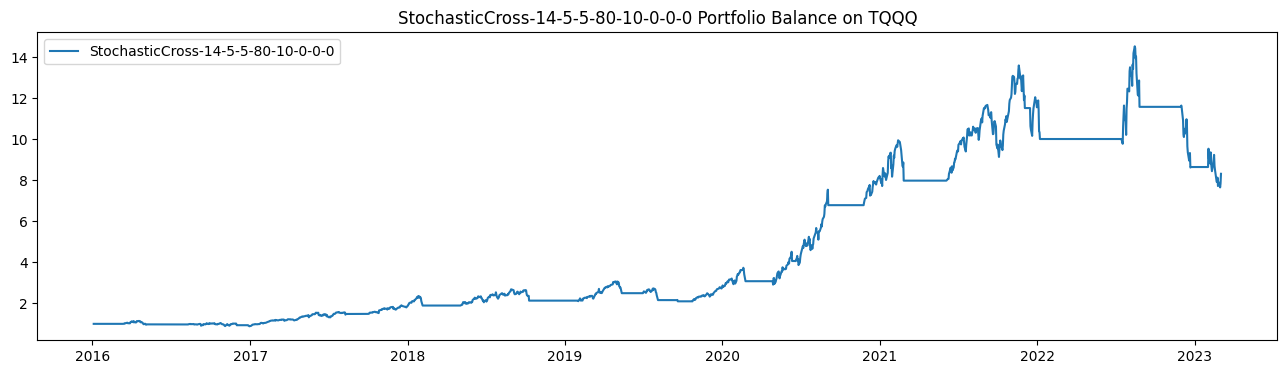

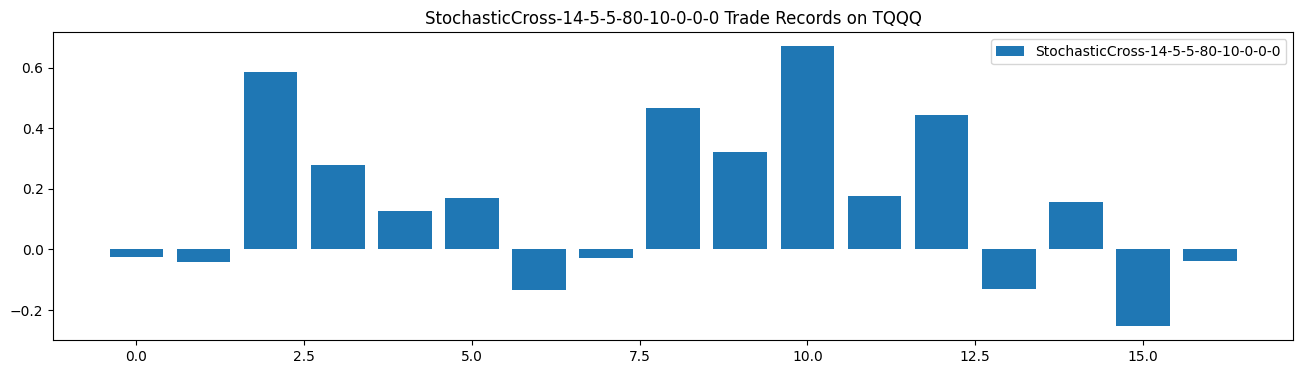

In [9]:
sc_bt.plot_balance()
sc_bt.plot_records()
sc_bt.performance_summary()
sc_bt.trade_records


Index(['TQQQ', 'Weekday_x', 'BSignal_x', 'SSignal_x', 'Signal', 'Cash',
       'Stock', 'Total', 'Margin', 'Trade', 'Buy Price', 'Profit', 'DClose',
       'D%K', 'D%D', 'WClose', 'W%K', 'W%D', 'W%K-UP', 'FastW%K', '13MIN',
       '13MAX', 'Weekday_y', '14MIN', '14MAX', 'FAST-WD%K', 'BSignal_y',
       'SSignal_y'],
      dtype='object')


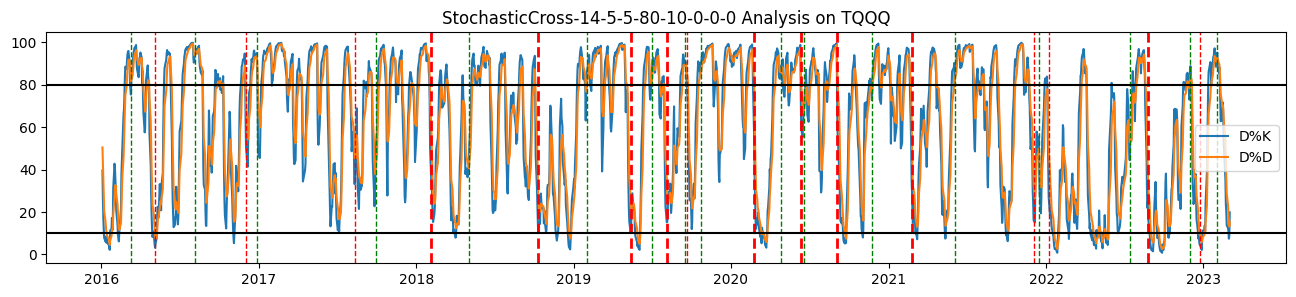

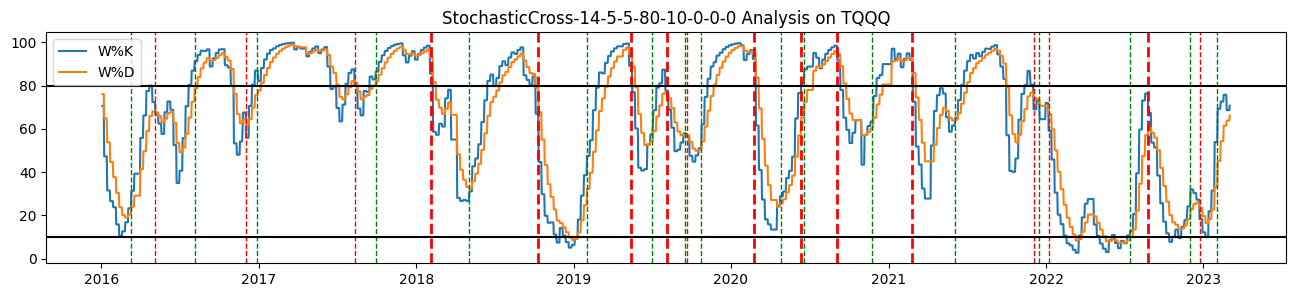

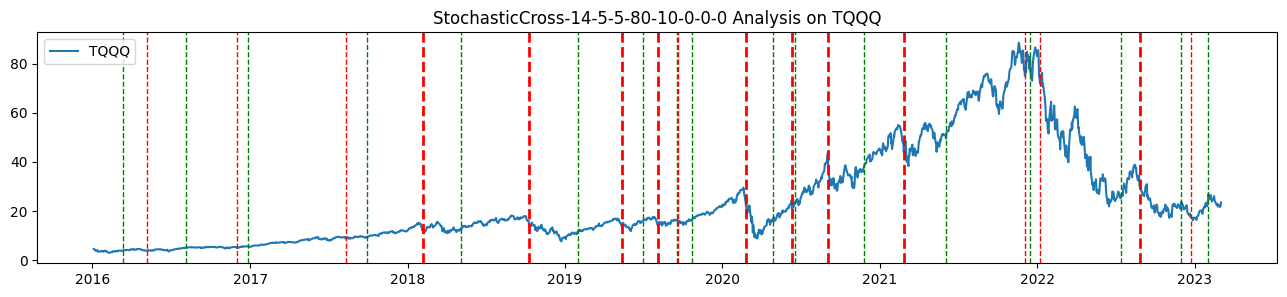

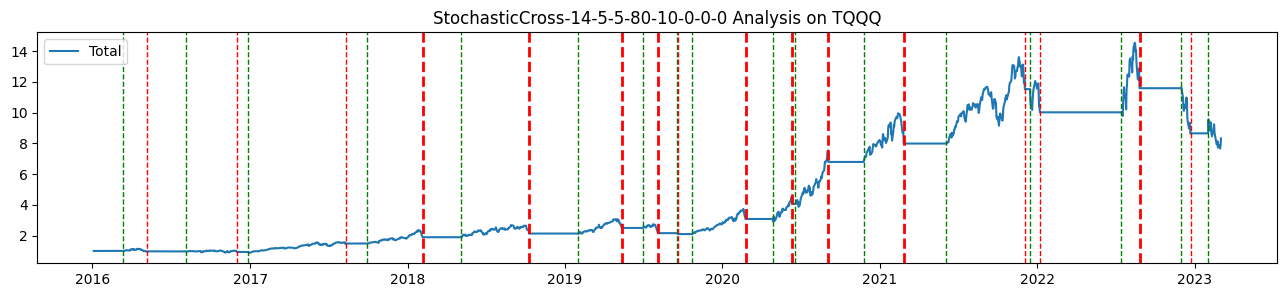

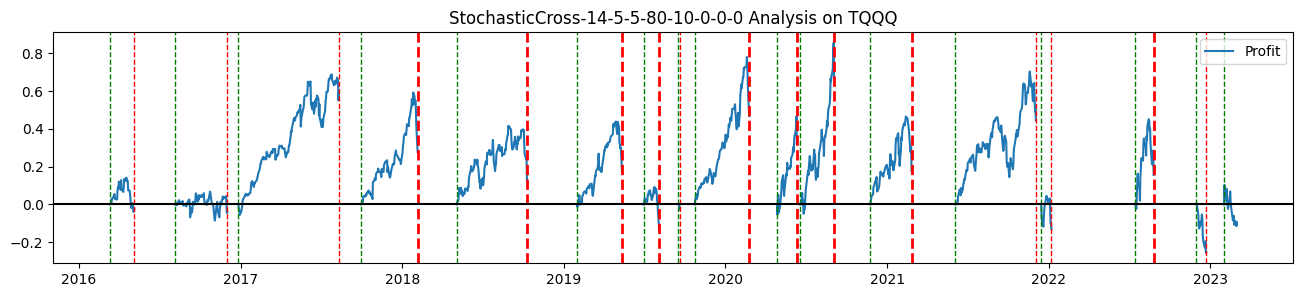

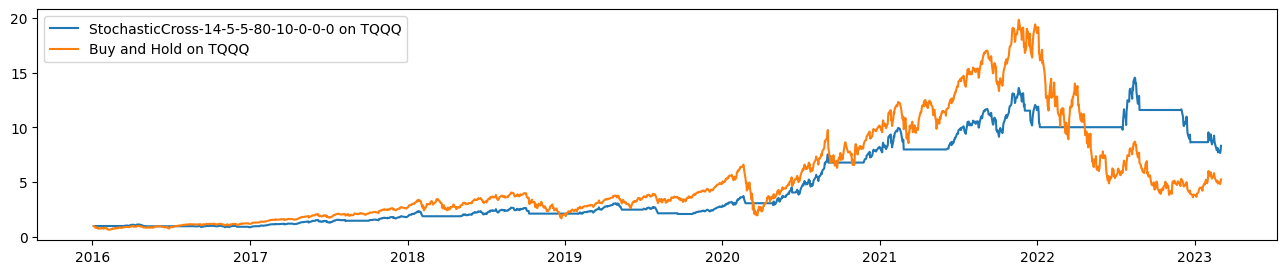

In [10]:
print(sc_bt.joined_data.columns)
sc_bt.plot_joined_data(['D%K','D%D'], plot_start, plot_end, ydash_low=stg.oversold, ydash_high=stg.overbought)
sc_bt.plot_joined_data(['W%K','W%D'], plot_start, plot_end, ydash_low=stg.oversold, ydash_high=stg.overbought)
#sc_bt.plot_joined_data(['WD%K','WD%D'], plot_start, plot_end, ydash_low=stg.oversold, ydash_high=stg.overbought)
sc_bt.plot_joined_data([ticker.ticker], plot_start, plot_end)
sc_bt.plot_joined_data(['Total'], plot_start, plot_end)
sc_bt.plot_joined_data(['Profit'], plot_start, plot_end, ydash_low=0)
sc_bt.joined_data.to_csv('{}.csv'.format(stg.name))
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 3))
plt.plot(sc_bt.balance.index, sc_bt.balance['Total'], label = '{} on {}'.format(sc_bt.name, ticker.ticker))
plt.plot(bah_bt.balance.index, bah_bt.balance['Total'], label = 'Buy and Hold on {} '.format(ticker.ticker))
plt.legend()

1

StochasticCross-14-5-5-80-10-1-0-0:
cumulative return      : 282.13%
compound anual return  : 21.1080%
max_drawdown           : -55.69%
sharp_ratio            : 4.10%
average of daily return: 0.1110%
std of daily return    : 2.7046%
number of trades       : 121,
trading days           : 2615,
batting Average        : 46.28%
Gain Average           : 9.60%
Loss Average           : -5.30%
Risk Reward Ratio      : 1.81
Gain STD               : 9.75%
Loss STD               : 3.69%
        
Index(['TQQQ', 'Weekday_x', 'BSignal_x', 'SSignal_x', 'Signal', 'Cash',
       'Stock', 'Total', 'Margin', 'Trade', 'Buy Price', 'Profit', 'DClose',
       'D%K', 'D%D', 'WClose', 'W%K', 'W%D', 'W%K-UP', 'FastW%K', '13MIN',
       '13MAX', 'Weekday_y', '14MIN', '14MAX', 'FAST-WD%K', 'BSignal_y',
       'SSignal_y'],
      dtype='object')


,Buy Date,Sell Date,Ticker,Quant,Buy Price,Sell Price,Profit,Profit %,HoldingDays,LongTermProfit,ShortTermProfit,TaxCollectYear,TaxCollected
0,2016-01-22,2016-02-04 00:00:00,TQQQ,0.268156,3.729167,3.479167,-0.067039,-0.067039,13.0,0.0,0.000000,2017.0,0.0
1,2016-02-16,2016-03-09 00:00:00,TQQQ,0.282288,3.305000,3.752500,0.126324,0.135401,22.0,0.0,0.126324,2017.0,0.0
2,2016-03-11,2016-04-05 00:00:00,TQQQ,0.269395,3.932083,4.237083,0.082166,0.077567,25.0,0.0,0.082166,2017.0,0.0
3,2016-04-13,2016-04-22 00:00:00,TQQQ,0.256026,4.458333,4.226667,-0.059313,-0.051962,9.0,0.0,0.000000,2017.0,0.0
4,2016-05-10,2016-05-19 00:00:00,TQQQ,0.268687,4.027500,3.793333,-0.062918,-0.058142,9.0,0.0,0.000000,2017.0,0.0
5,2016-05-20,2016-06-13 00:00:00,TQQQ,0.260005,3.920000,4.082500,0.042251,0.041454,24.0,0.0,0.042251,2017.0,0.0
6,2016-06-23,2016-06-24 00:00:00,TQQQ,0.253234,4.191667,3.772500,-0.106147,-0.100000,1.0,0.0,0.000000,2017.0,0.0
7,2016-06-29,2016-08-24 00:00:00,TQQQ,0.246694,3.872500,5.109167,0.305079,0.319346,56.0,0.0,0.305079,2017.0,0.0
8,2016-09-02,2016-09-09 00:00:00,TQQQ,0.244917,5.146250,4.770000,-0.092150,-0.073111,7.0,0.0,0.000000,2017.0,0.0
9,2016-09-15,2016-09-29 00:00:00,TQQQ,0.225133,5.189167,5.250000,0.013696,0.011723,14.0,0.0,0.013696,2017.0,0.0


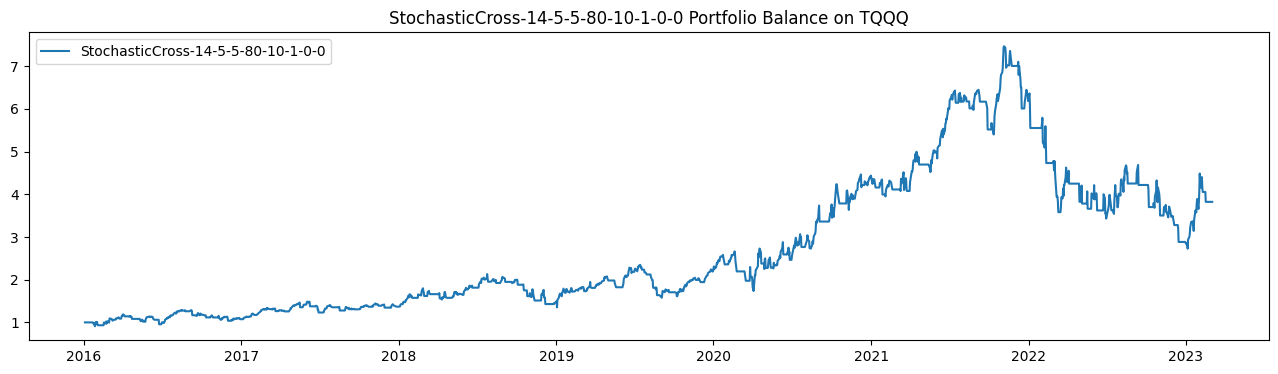

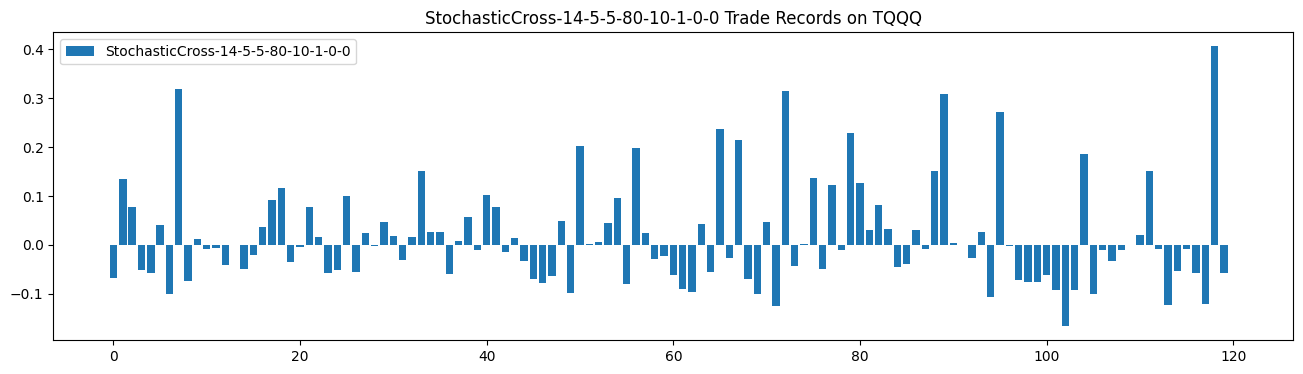

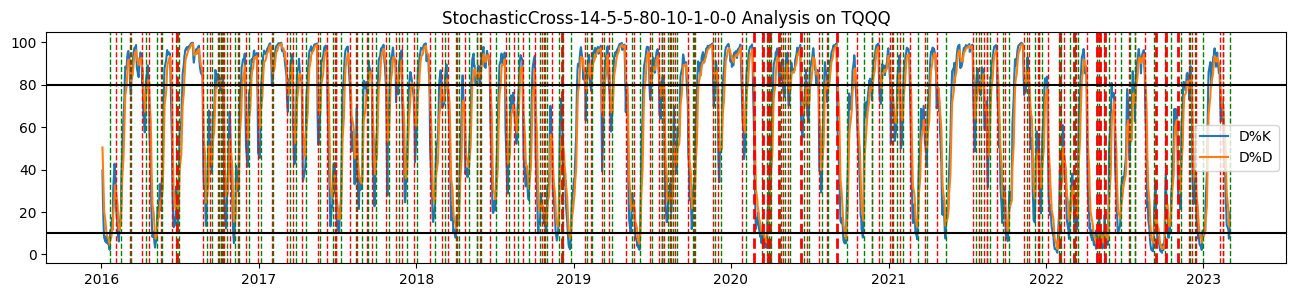

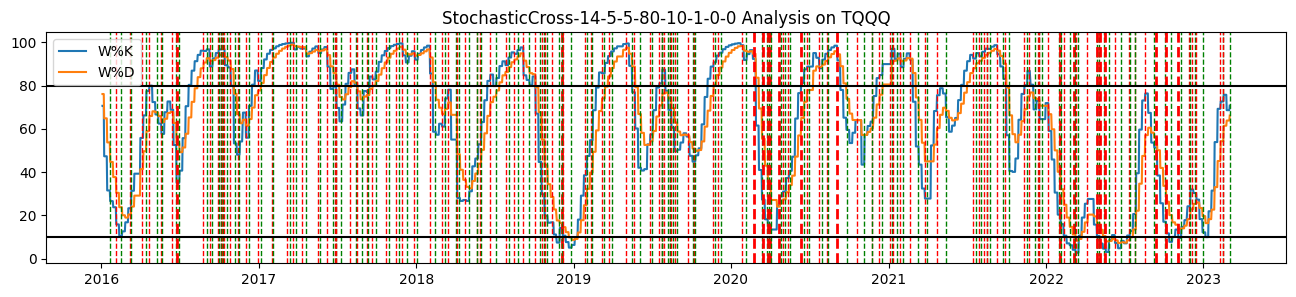

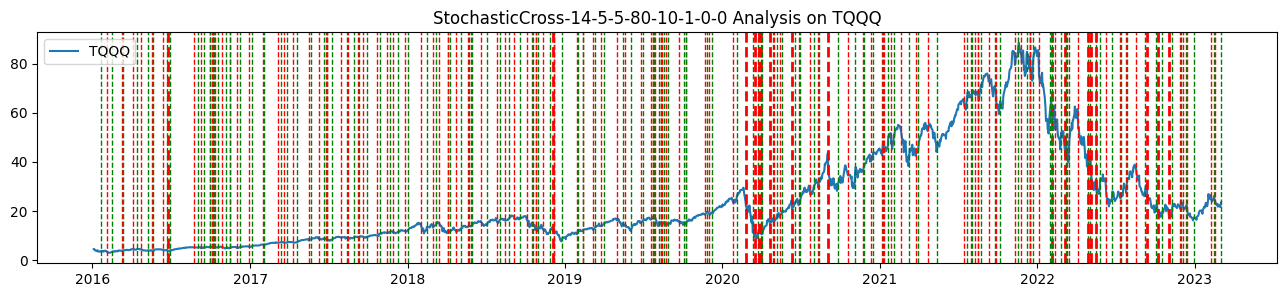

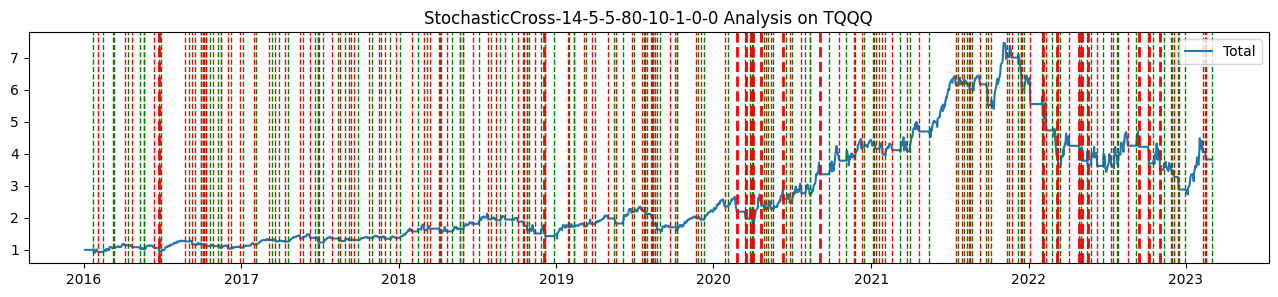

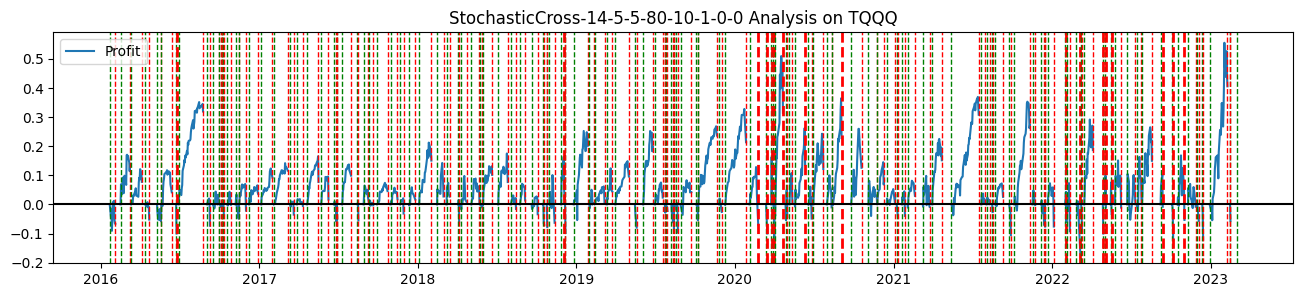

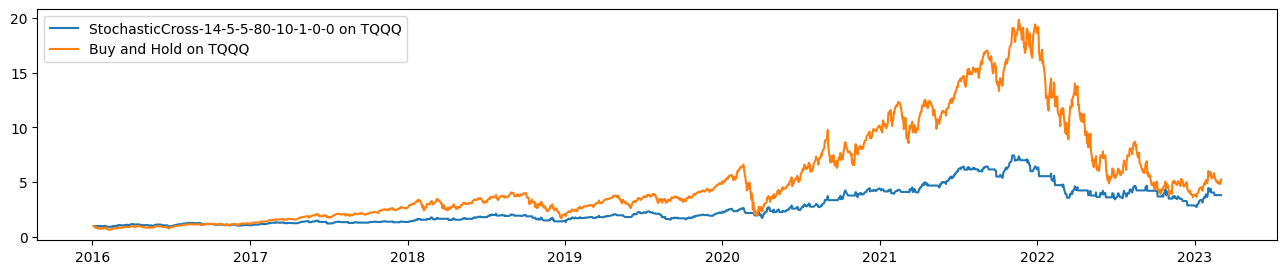

In [11]:
stg2 = ab.StochasticCross('StochasticCross',14, 5, 5, 80, 10, 0, 0, 1, 0)
stg2.run_strategy([ticker,ticker_weekly], test_start, test_end)
sc_bt2 = ab.BackTest()
sc_bt2.run_backtest(stg2,ticker,test_start,test_end)
sc_bt2.plot_balance()
sc_bt2.plot_records()
sc_bt2.performance_summary()
print(sc_bt2.joined_data.columns)
sc_bt2.plot_joined_data(['D%K','D%D'], plot_start, plot_end, ydash_low=stg2.oversold, ydash_high=stg2.overbought)
sc_bt2.plot_joined_data(['W%K','W%D'], plot_start, plot_end, ydash_low=stg2.oversold, ydash_high=stg2.overbought)
#sc_bt2.plot_joined_data(['WD%K','WD%D'], plot_start, plot_end, ydash_low=stg2.oversold, ydash_high=stg2.overbought)
sc_bt2.plot_joined_data([ticker.ticker], plot_start, plot_end)
sc_bt2.plot_joined_data(['Total'], plot_start, plot_end)
sc_bt2.plot_joined_data(['Profit'], plot_start, plot_end, ydash_low=0)
sc_bt2.joined_data.to_csv('{}.csv'.format(stg2.name))
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 3))
plt.plot(sc_bt2.balance.index, sc_bt2.balance['Total'], label = '{} on {}'.format(sc_bt2.name, ticker.ticker))
plt.plot(bah_bt.balance.index, bah_bt.balance['Total'], label = 'Buy and Hold on {} '.format(ticker.ticker))
plt.legend()
sc_bt2.trade_records


StochasticCross-14-5-5-80-10-0-50-0:
cumulative return      : 485.56%
compound anual return  : 28.7222%
max_drawdown           : -38.42%
sharp_ratio            : 6.18%
average of daily return: 0.1158%
std of daily return    : 1.8730%
number of trades       : 23,
trading days           : 2615,
batting Average        : 50.00%
Gain Average           : 26.23%
Loss Average           : -5.81%
Risk Reward Ratio      : 4.52
Gain STD               : 20.66%
Loss STD               : 3.62%
        


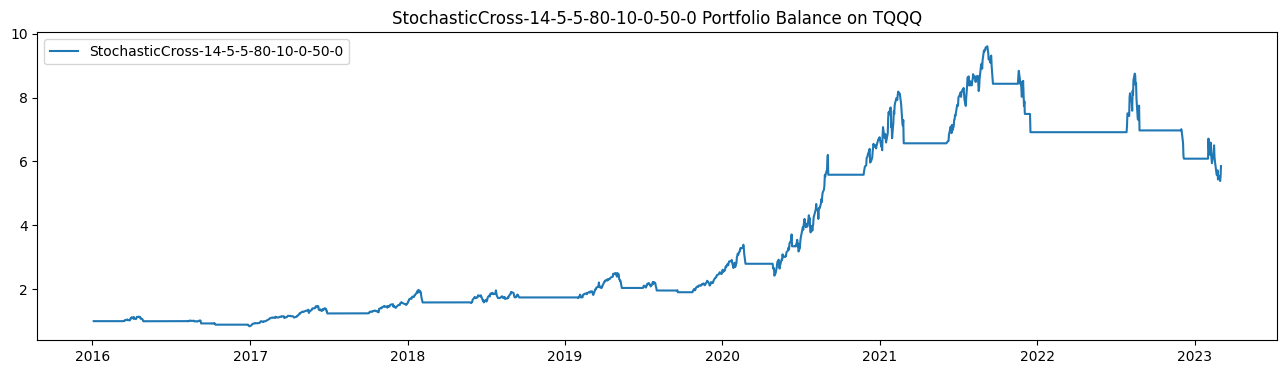

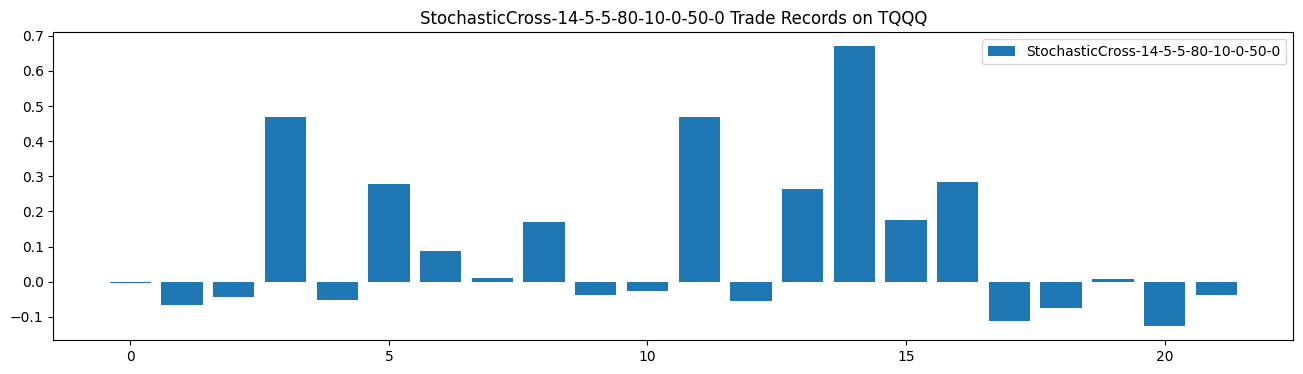

In [12]:
stg_50ma = ab.StochasticCross('StochasticCross',14, 5, 5, 80, 10, var=0, ma_notrade=50)
stg_50ma.run_strategy([ticker,ticker_weekly], test_start, test_end)
stg_50ma_bt = ab.BackTest()
stg_50ma_bt.run_backtest(stg_50ma,ticker,test_start,test_end)
stg_50ma_bt.plot_balance()
stg_50ma_bt.plot_records()
stg_50ma_bt.performance_summary()
stg_50ma_bt.trade_records
stg_50ma_bt.joined_data.to_csv('{}.csv'.format(stg_50ma.name))

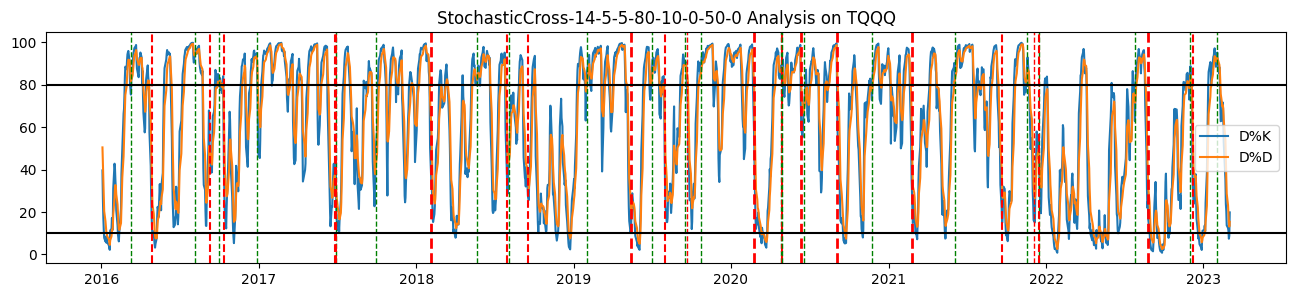

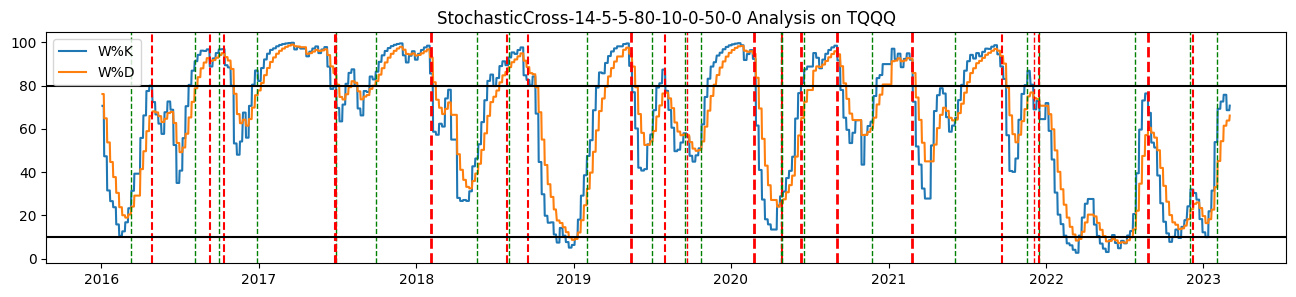

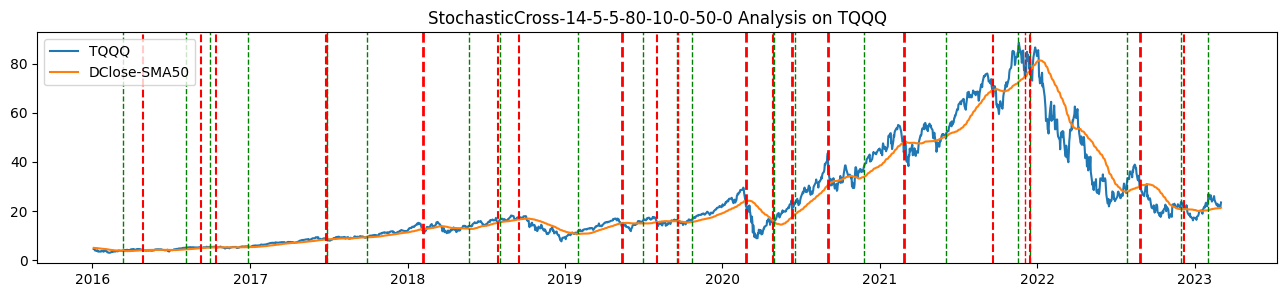

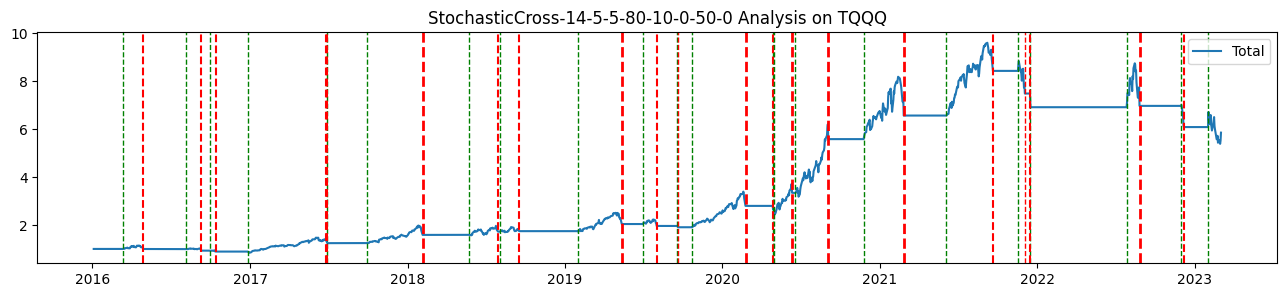

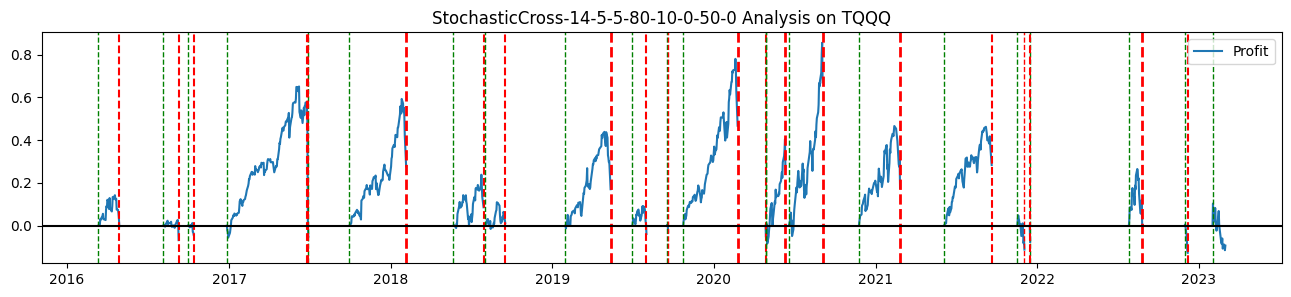

In [13]:
stg_50ma_bt.plot_joined_data(['D%K','D%D'], plot_start, plot_end, ydash_low=stg_50ma.oversold, ydash_high=stg_50ma.overbought)
stg_50ma_bt.plot_joined_data(['W%K','W%D'], plot_start, plot_end, ydash_low=stg_50ma.oversold, ydash_high=stg_50ma.overbought)
stg_50ma_bt.plot_joined_data([ticker.ticker, 'DClose-SMA50'], plot_start, plot_end)
stg_50ma_bt.plot_joined_data(['Total'], plot_start, plot_end)
stg_50ma_bt.plot_joined_data(['Profit'], plot_start, plot_end, ydash_low=0)


StochasticCross-14-5-5-80-10-0-200-0:
cumulative return      : 580.37%
compound anual return  : 31.5114%
max_drawdown           : -36.67%
sharp_ratio            : 6.69%
average of daily return: 0.1237%
std of daily return    : 1.8494%
number of trades       : 17,
trading days           : 2615,
batting Average        : 56.25%
Gain Average           : 32.91%
Loss Average           : -7.29%
Risk Reward Ratio      : 4.51
Gain STD               : 21.87%
Loss STD               : 4.28%
        


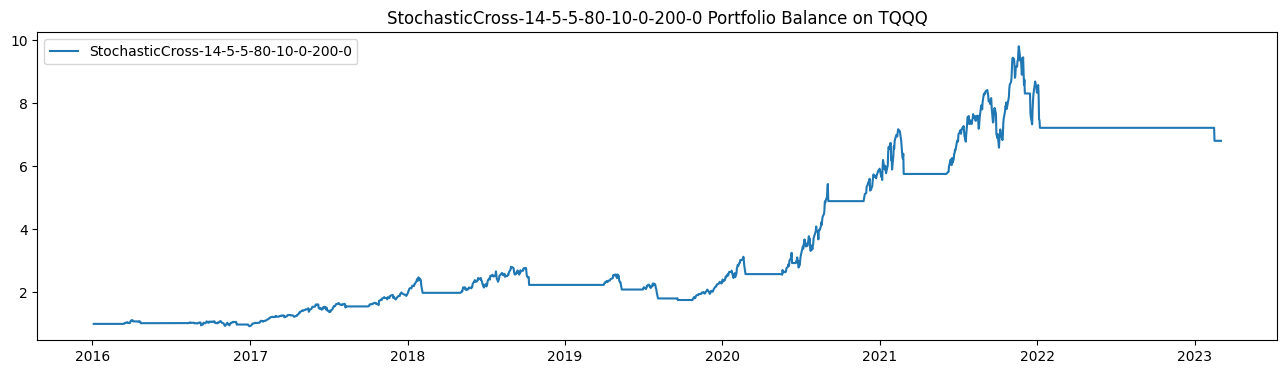

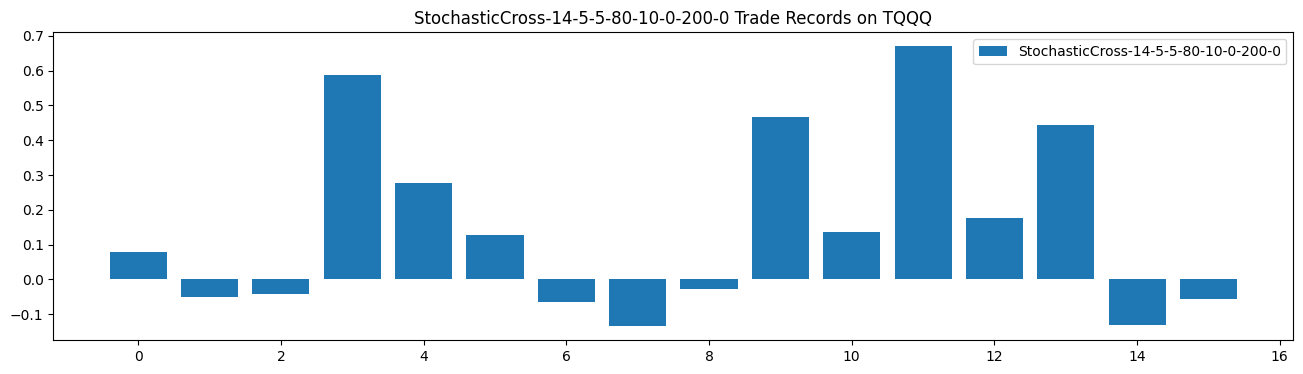

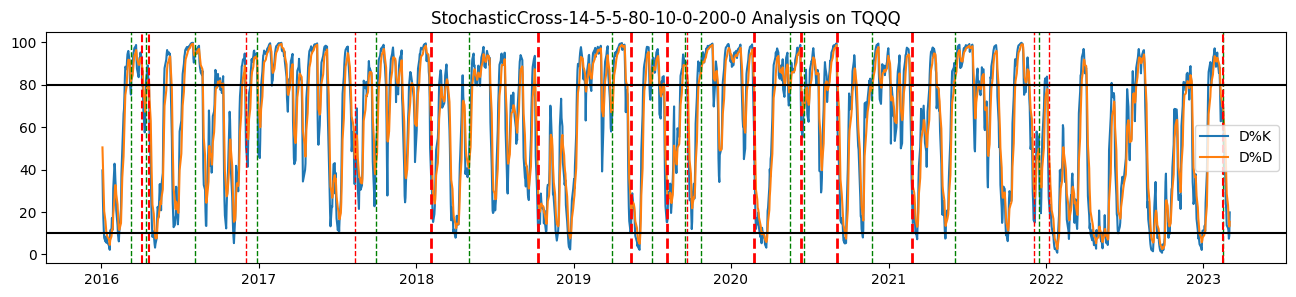

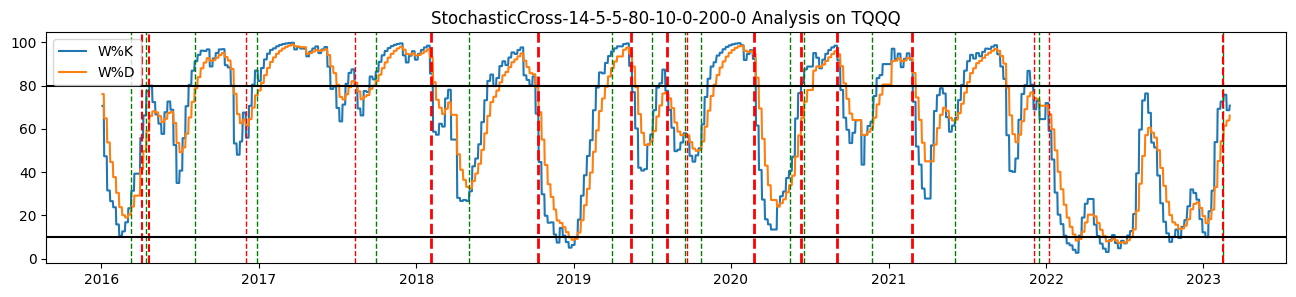

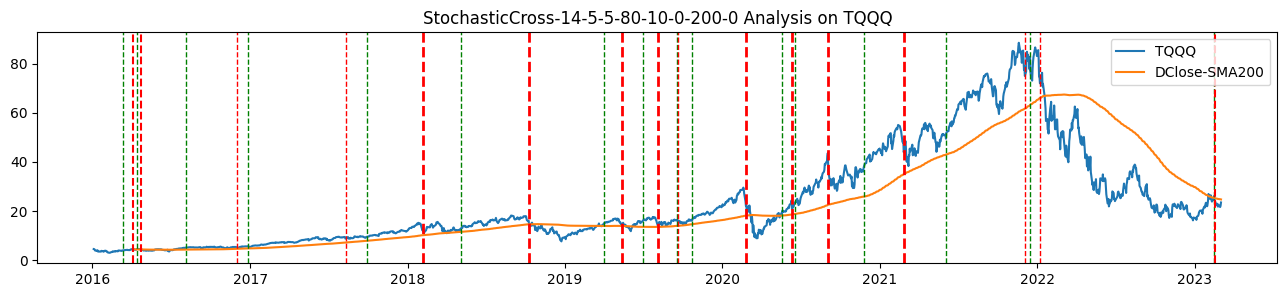

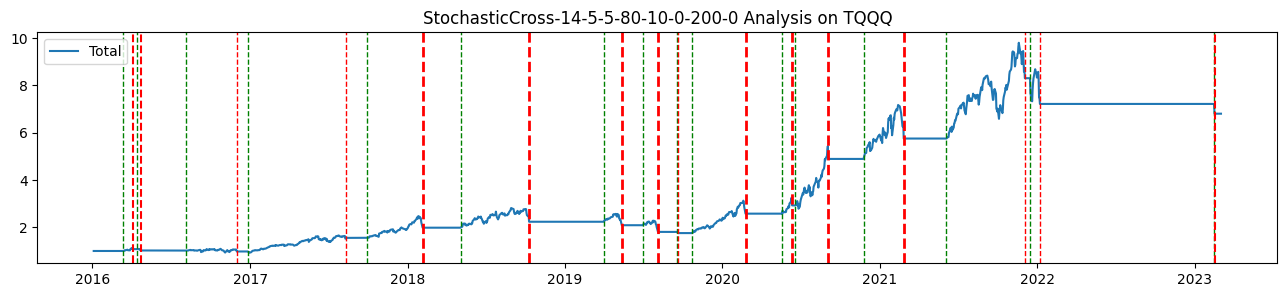

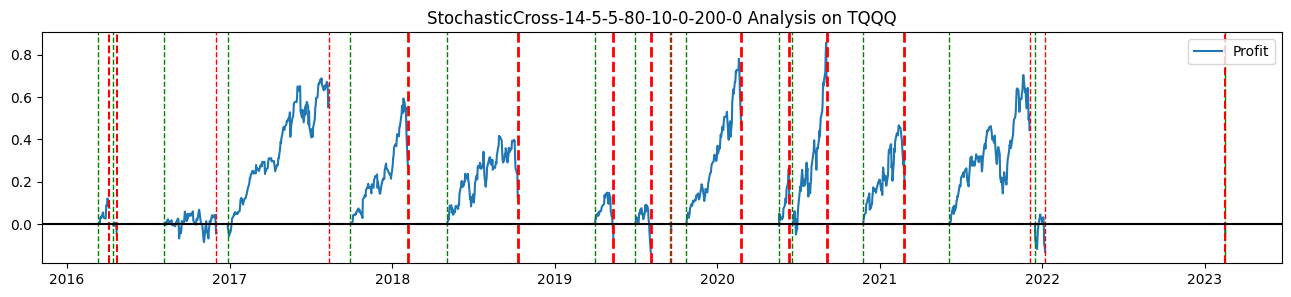

In [14]:
stg_200ma = ab.StochasticCross('StochasticCross',14, 5, 5, 80, 10, var=0, ma_notrade=200)
stg_200ma.run_strategy([ticker,ticker_weekly], test_start, test_end)

stg_200ma_bt = ab.BackTest()
stg_200ma_bt.run_backtest(stg_200ma,ticker,test_start,test_end)

stg_200ma_bt.plot_balance()
stg_200ma_bt.plot_records()
stg_200ma_bt.performance_summary()
stg_200ma_bt.plot_joined_data(['D%K','D%D'], plot_start, plot_end, ydash_low=stg_200ma.oversold, ydash_high=stg_200ma.overbought)
stg_200ma_bt.plot_joined_data(['W%K','W%D'], plot_start, plot_end, ydash_low=stg_200ma.oversold, ydash_high=stg_200ma.overbought)
stg_200ma_bt.plot_joined_data([ticker.ticker,'DClose-SMA200'], plot_start, plot_end)
stg_200ma_bt.plot_joined_data(['Total'], plot_start, plot_end)
stg_200ma_bt.plot_joined_data(['Profit'], plot_start, plot_end, ydash_low=0)
sc_bt.trade_records
stg_200ma_bt.joined_data.to_csv('{}.csv'.format(stg_200ma.name))